# Analysing a regular ECG signal

In this notebook I'll show you three examples of using HeartPy to analyse good-to-reasonable quality ECG signals you may encounter.

We'll be looking at three excerpts from the [European ST-T Database over at Physionet](https://physionet.org/content/edb/1.0.0/). There are all recorded at 250 Hz

# 일반 심전도 신호 분석

이 노트에서는 HeartPy를 사용하여 발생할 수 있는 양호하고 합리적인 품질의 심전도 신호를 분석하는 세 가지 예를 보여드리겠습니다.

[European ST-T Database over Physionet](https://physionet.org/content/edb/1.0.0/))에서 발췌한 세 가지 내용을 살펴보겠습니다. 모두 250Hz로 기록됩니다.

In [28]:
#import packages
import heartpy as hp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [52]:
import heartpy as hp

data =hp.get_data("S1_ECG_CaseB.csv")
fs = 500.0 #example file 0 is sampled at 100.0 Hz

working_data, measures = hp.process(data, fs, report_time=True)

print(measures['bpm']) #returns BPM value
print(measures['rmssd']) # returns RMSSD HRV measure

#You can also use Pandas if you so desire
import pandas as pd
df = pd.read_csv("S1_ECG_CaseB.csv", names=['hr'])

#note we need calc_freq if we want frequency-domain measures
working_data, measures = hp.process(df['hr'].values, fs, calc_freq=True)
print(measures['bpm'])
print(measures['lf/hf'])
print(measures['sdnn'])





Finished in 0.002902 sec
85.22727272727273
13.386560424545209
85.22727272727273
nan
10.066445913694333


c:\Users\kimgayoung\AppData\Local\Programs\Python\Python311\Lib\site-packages\heartpy\analysis.py:522: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
  warnings.warn(msg, UserWarning)


Let's look at the first file and visualise it:

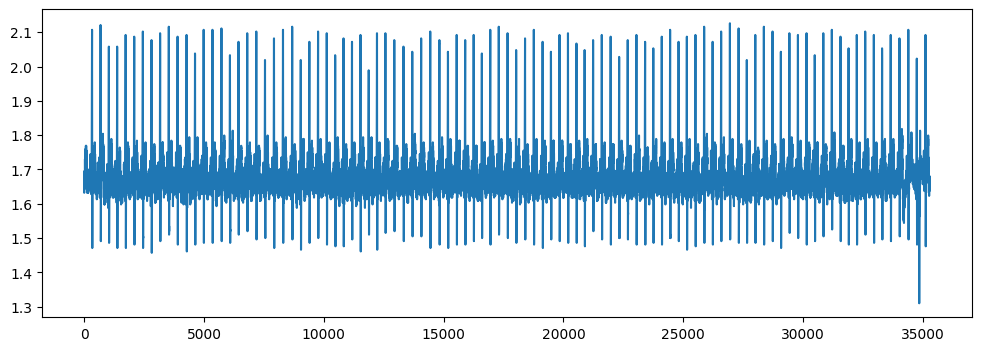

In [22]:
data = hp.get_data(df_file)
plt.figure(figsize=(12,4))
plt.plot(data)
plt.show()

In [23]:
import heartpy as hp

data = hp.load_exampledata(0)
fs = 100.0 #example file 0 is sampled at 100.0 Hz

working_data, measures = hp.process(data, fs, report_time=True)

print(measures['bpm']) #returns BPM value
print(measures['rmssd']) # returns RMSSD HRV measure

#You can also use Pandas if you so desire
import pandas as pd
df = pd.read_csv("data.csv", names=['hr'])
#note we need calc_freq if we want frequency-domain measures
working_data, measures = hp.process(df['hr'].values, fs, calc_freq=True)
print(measures['bpm'])
print(measures['lf/hf'])

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

That is a very nice and clean signal. We don't need to do any preprocessing and can run analysis right away:

그것은 매우 멋지고 깨끗한 신호이다. 사전 처리를 수행할 필요가 없으며 즉시 분석을 실행할 수 있습니다

In [19]:
#run analysis
wd, m = hp.process(data, sample_rate)

#visualise in plot of custom size
plt.figure(figsize=(12,4))
hp.plotter(wd, m)

#display computed measures
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

ValueError: negative dimensions are not allowed

#### That went well. 

Now let's move on to the next one and see if we can analyse that one too:

#### 잘 됐어요.

이제 다음 항목으로 이동하여 해당 항목도 분석할 수 있는지 알아보겠습니다.

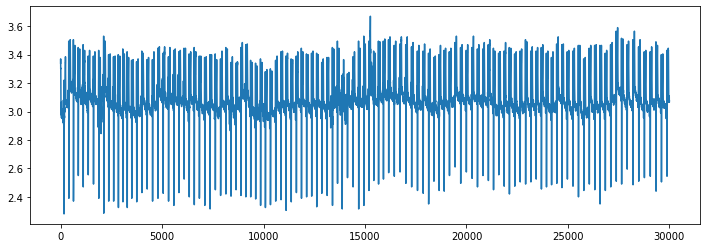

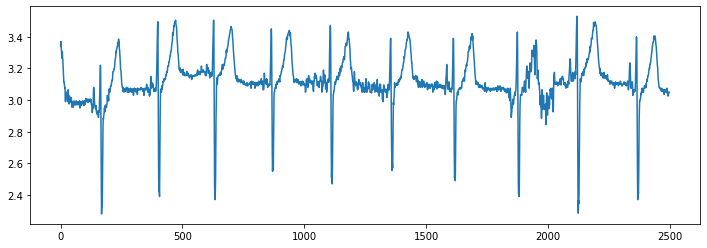

In [4]:
data = hp.get_data('e0110.csv')

plt.figure(figsize=(12,4))
plt.plot(data)
plt.show()

#and zoom in a bit
plt.figure(figsize=(12,4))
plt.plot(data[0:2500])
plt.show()

#### Ah!

We have an issue where the T-wave (the broad wave right after the main QRS complex) is present. We can filter this using a notch filter, as we're interested in the QRS comples.

What the notch filter does is apply a frequency filter to a very narrow frequency range, allowing us to get rid of some things without disturbing the QRS complexes.


#### 아!

우리는 T파(주요 QRS 복합체 직후의 광파)가 존재하는 문제가 있다. 우리는 QRS 복합체에 관심이 있기 때문에 노치 필터를 사용하여 이것을 필터링할 수 있습니다.

노치 필터는 매우 좁은 주파수 범위에 주파수 필터를 적용하여 QRS 복합체를 방해하지 않고 일부를 제거할 수 있습니다.

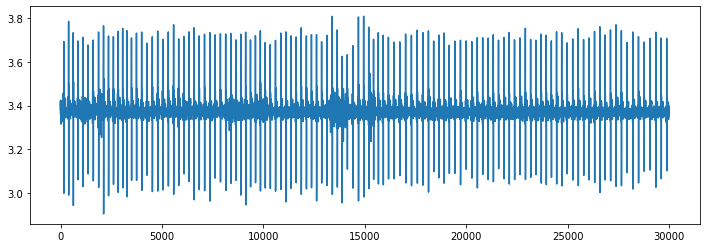

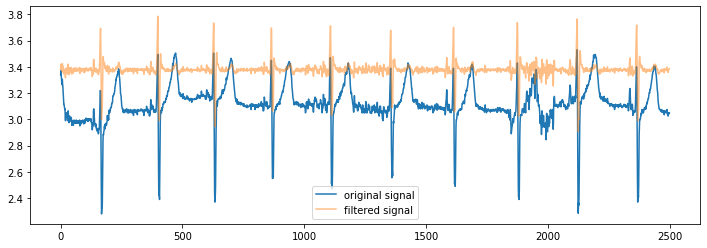

In [5]:
filtered = hp.filter_signal(data, cutoff = 0.05, sample_rate = sample_rate, filtertype='notch')

#visualize again
plt.figure(figsize=(12,4))
plt.plot(filtered)
plt.show()

#and zoom in a bit
plt.figure(figsize=(12,4))
plt.plot(data[0:2500], label = 'original signal')
plt.plot(filtered[0:2500], alpha=0.5, label = 'filtered signal')
plt.legend()
plt.show()

#### We've now reduced the amplitude of the T-wave and are ready for analysis

#### 이제 T파의 진폭을 줄이고 분석할 준비가 되었습니다.

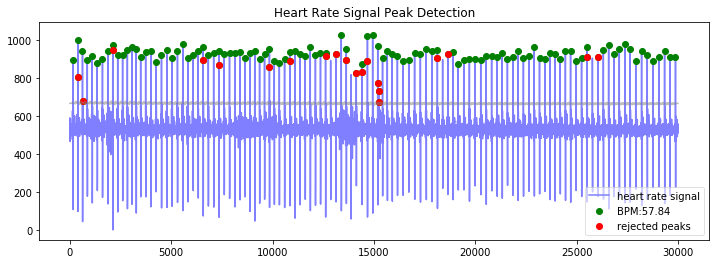

bpm: 57.843015
ibi: 1037.290323
sdnn: 60.906871
sdsd: 20.513036
rmssd: 33.059617
pnn20: 0.493827
pnn50: 0.135802
hr_mad: 36.000000
sd1: 23.285718
sd2: 84.305770
s: 6167.324586
sd1/sd2: 0.276206
breathingrate: 0.075000


In [6]:
#run analysis
wd, m = hp.process(hp.scale_data(filtered), sample_rate)

#visualise in plot of custom size
plt.figure(figsize=(12,4))
hp.plotter(wd, m)

#display computed measures
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

#### Oh dear

HeartPy is distrusting some peaks. This is because HeartPy's optimizer likes broader peaks than some ECG recordings provide (especially lower sampling rates). Usually when filtering the peak width decreases as well, potentially causing issues. 

The solution is simple. We can upsample the signal using [scipy.signal.resample](https://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.signal.resample.html) to help with this!


#### 오 이런

HeartPy는 몇몇 봉우리들을 불신하고 있다. 이는 HeartPy의 옵티마이저가 일부 심전도 기록이 제공하는 것보다 더 넓은 피크(특히 낮은 샘플링 속도)를 좋아하기 때문입니다. 일반적으로 필터링할 때 피크 폭도 감소하여 문제가 발생할 수 있습니다. 

해결책은 간단하다. [scipy.signal.resample](https://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.signal.resample.html)을 사용하여 신호를 업샘플링할 수 있습니다!

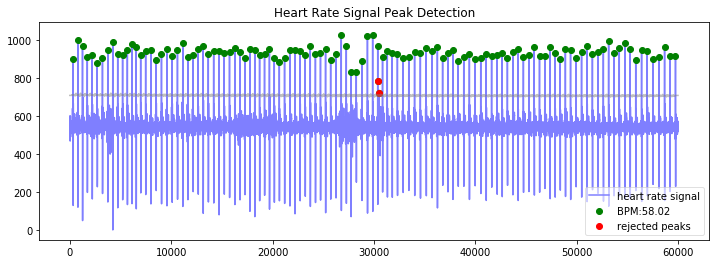

bpm: 58.018220
ibi: 1034.157895
sdnn: 59.536305
sdsd: 21.549303
rmssd: 34.825073
pnn20: 0.544643
pnn50: 0.133929
hr_mad: 35.000000
sd1: 24.588644
sd2: 80.051446
s: 6183.774312
sd1/sd2: 0.307161
breathingrate: 0.116667


In [7]:
from scipy.signal import resample

#resample the data. Usually 2, 4, or 6 times is enough depending on original sampling rate
resampled_data = resample(filtered, len(filtered) * 2)

#And run the analysis again. Don't forget to up the sample rate as well!
wd, m = hp.process(hp.scale_data(resampled_data), sample_rate * 2)

#visualise in plot of custom size
plt.figure(figsize=(12,4))
hp.plotter(wd, m)

#display computed measures
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

Upsampling the signal has enabled HeartPy to optimize and find the position for all peaks in the signal.

Note the use of ***hp.scale_data()*** in the processing function. This is recommended when the amplitude is low (2.4-3.8 in the original data).

------------

Let's look at the last example


신호를 업샘플링하면 HeartPy가 신호의 모든 피크에 대한 위치를 최적화하고 찾을 수 있습니다.

처리 기능에서 ***hp.scale_data()***를 사용하는 것에 주목하십시오. 진폭이 낮을 때(원래 데이터의 경우 2.4-3.8) 권장됩니다.

------------

마지막 예를 보겠습니다.

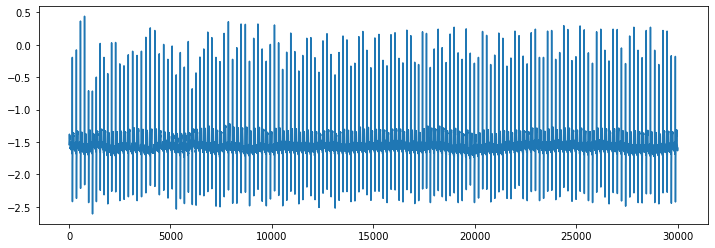

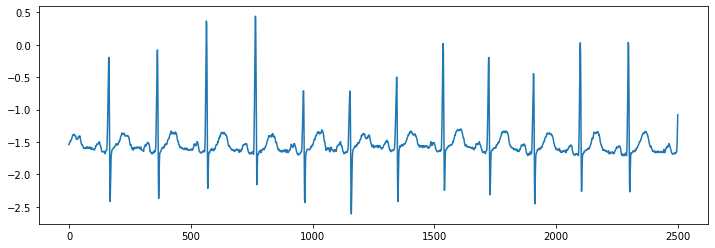

In [8]:
data = hp.get_data('e0124.csv')

plt.figure(figsize=(12,4))
plt.plot(data)
plt.show()

#and zoom in a bit
plt.figure(figsize=(12,4))
plt.plot(data[0:2500])
plt.show()

Again we have a very strong signal present in the recording. That is always nice to see. Analysis again is then straightforward:

다시 말하지만 우리는 녹음에 매우 강한 신호를 가지고 있다. 그것은 언제나 보기 좋다. 분석도 간단합니다.

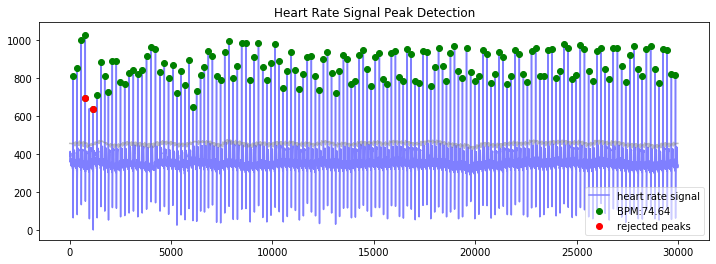

bpm: 74.642232
ibi: 803.834483
sdnn: 25.854237
sdsd: 8.060314
rmssd: 13.118076
pnn20: 0.104895
pnn50: 0.000000
hr_mad: 16.000000
sd1: 9.272843
sd2: 35.470837
s: 1033.318549
sd1/sd2: 0.261422
breathingrate: 0.175000


In [9]:
#run analysis
wd, m = hp.process(hp.scale_data(data), sample_rate)

#visualise in plot of custom size
plt.figure(figsize=(12,4))
hp.plotter(wd, m)

#display computed measures
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

#### And again we can fix the 'mistrusted' peaks with modest upsampling

#### 그리고 다시 우리는 약간의 업샘플링으로 '신뢰할 수 없는' 피크를 고칠 수 있다.

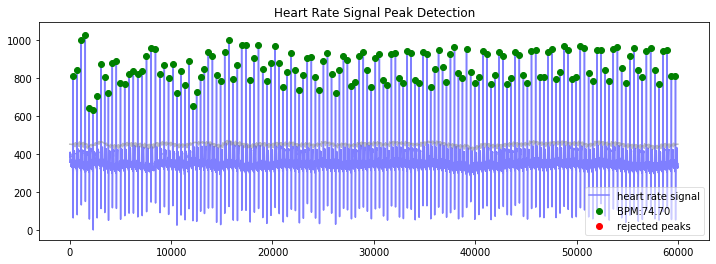

bpm: 74.700944
ibi: 803.202703
sdnn: 25.987252
sdsd: 8.037765
rmssd: 13.000262
pnn20: 0.095238
pnn50: 0.000000
hr_mad: 14.000000
sd1: 9.192447
sd2: 35.707405
s: 1031.191456
sd1/sd2: 0.257438
breathingrate: 0.125000


In [10]:
#resample the data. Usually 2, 4, or 6 times is enough depending on original sampling rate
resampled_data = resample(data, len(filtered) * 2)

#And run the analysis again. Don't forget to up the sample rate as well!
wd, m = hp.process(hp.scale_data(resampled_data), sample_rate * 2)

#visualise in plot of custom size
plt.figure(figsize=(12,4))
hp.plotter(wd, m)

#display computed measures
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

## Since 1.2.4 HeartPy includes Poincaré nonlinear methods too

Use them like the plotter function:

## 1.2.4 HeartPy는 Poincaré 비선형 방법도 포함하므로

플로터 함수와 같이 사용합니다.

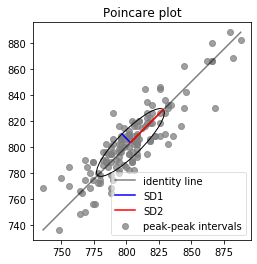


nonlinear poincare measures:
sd1: 9.192447
sd2: 35.707405
s: 1031.191456
sd1/sd2: 0.257438


In [11]:
hp.plot_poincare(wd, m)

#print poincare measures
poincare_measures = ['sd1', 'sd2', 's', 'sd1/sd2']
print('\nnonlinear poincare measures:')
for measure in poincare_measures:
    print('%s: %f' %(measure, m[measure]))

## That's it!

I hope this notebook has given you an overview of how to analyse good to medium quality ECG data. 

There's also a more advanced notebook available on the repository on [how to handle poor quality ECG data](https://github.com/paulvangentcom/heartrate_analysis_python/blob/master/examples/noisy_ECG/Analysing_Noisy_ECG.ipynb).


## 바로 그거야!

이 노트가 양호한 품질에서 중간 품질의 심전도 데이터를 분석하는 방법에 대한 개요를 제공해 주었기를 바랍니다. 

저장소에서 [불량한 심전도 데이터를 처리하는 방법](https://github.com/paulvangentcom/heartrate_analysis_python/blob/master/examples/noisy_ECG/Analysing_에 대한 고급 노트북도 있습니다.Noise_ECG.ipynb).